#Flight Price Prediction

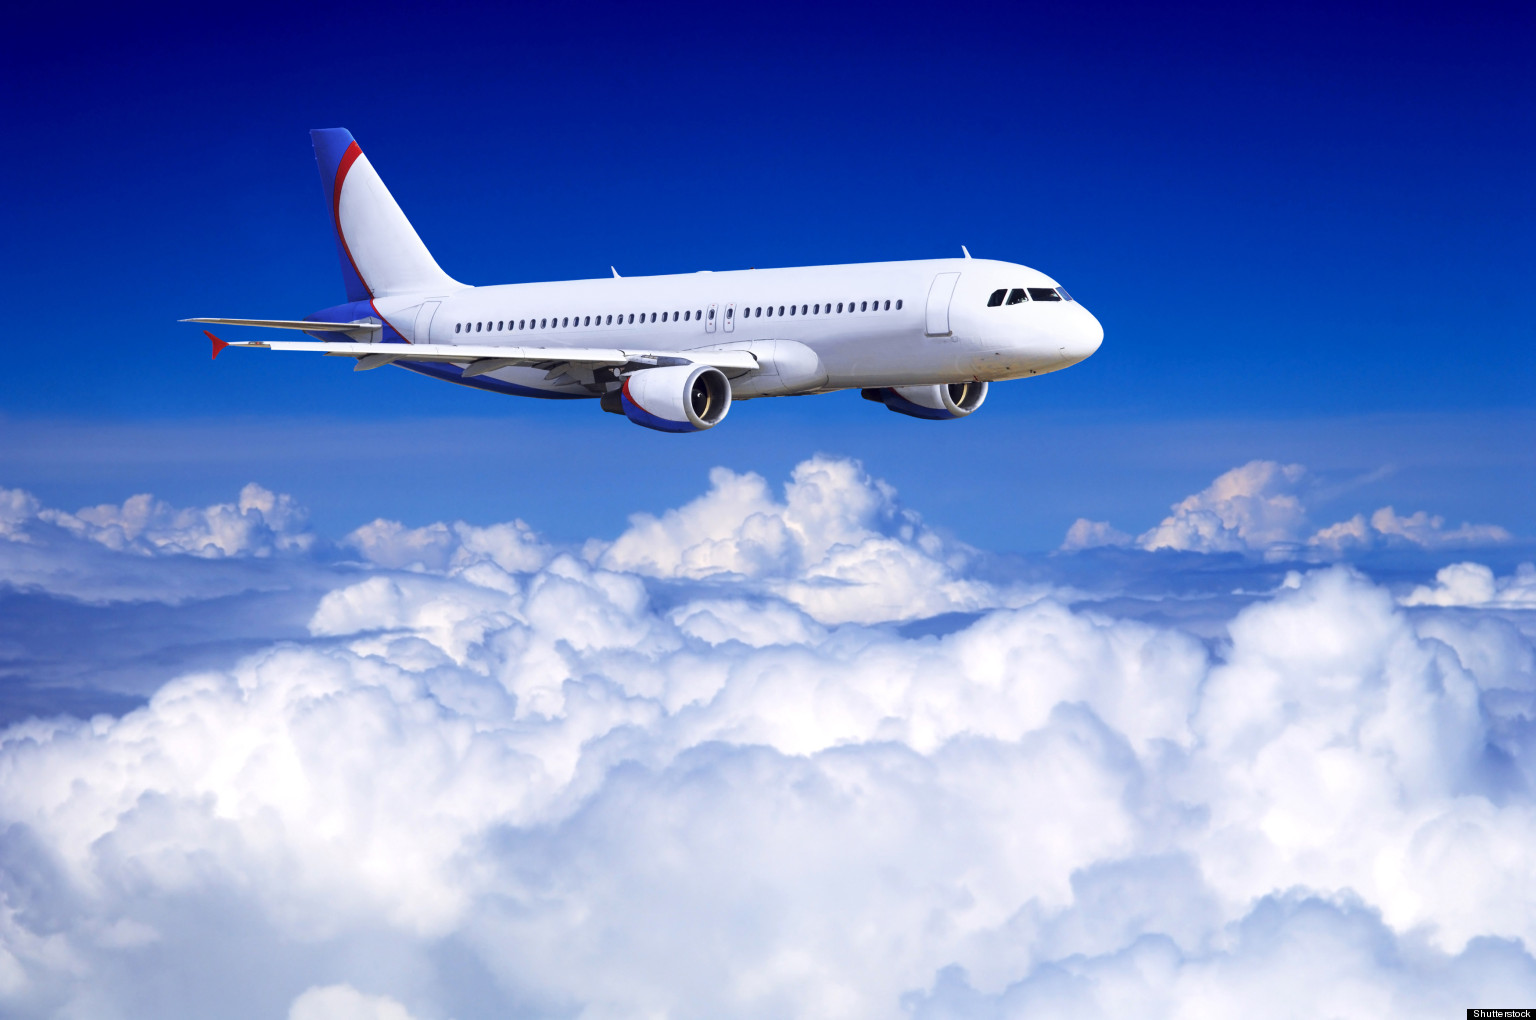

####Problem Statement

The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

####Importing Dataset

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
flight = pd.read_csv('/content/Flight_Booking.csv')
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#no of columns
flight.columns.nunique()

12

In [ ]:
#columns names
flight.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
#dataset info
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


###EDA [Exploratory Data Analysis]

In [ ]:
#drop unwanted column
flight.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#null values
flight.isna().sum().sum()

np.int64(0)

In [ ]:
#duplicate column
flight.duplicated().sum()

np.int64(0)

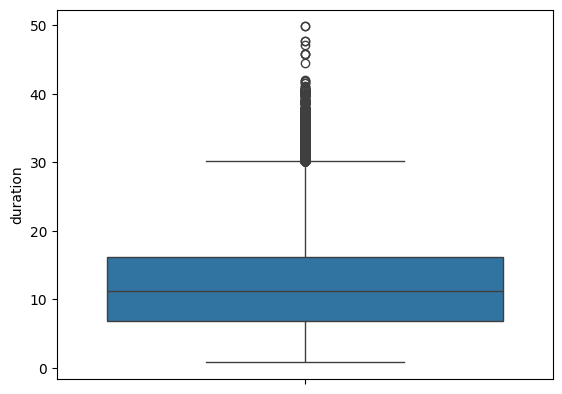

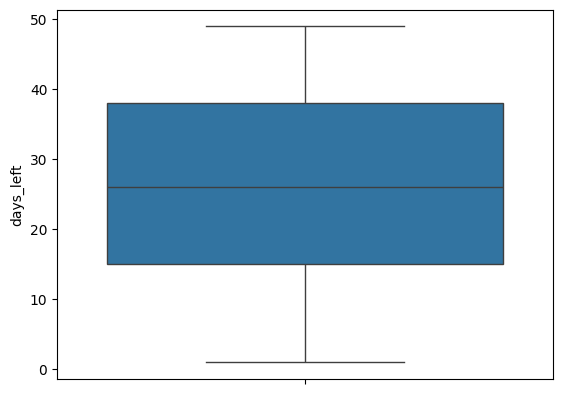

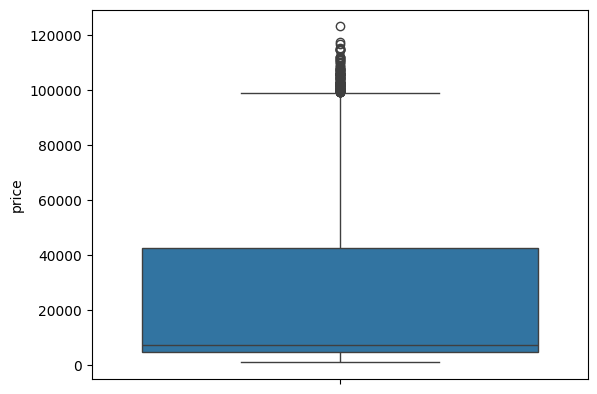

In [ ]:
for col in flight.select_dtypes(include='number').columns:
  sns.boxplot(flight[col])
  plt.show()

In [ ]:
#removing outliers
for col in flight.select_dtypes(include='number').columns:
  q1=flight[col].quantile(0.25)
  q3=flight[col].quantile(0.75)
  iqr=q3-q1
  lb=q1-1.5*iqr
  ub=q3+1.5*iqr
  flight=flight[(flight[col]>=lb)&(flight[col]<=ub)]

###Visualization

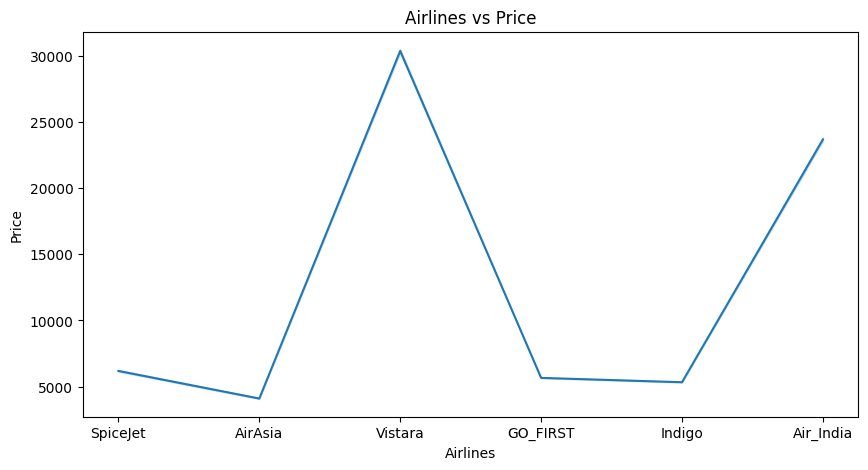

In [ ]:
#prices vs airlines
plt.figure(figsize=(10,5))
sns.lineplot(x=flight['airline'], y=flight['price'])
plt.title('Airlines vs Price')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()

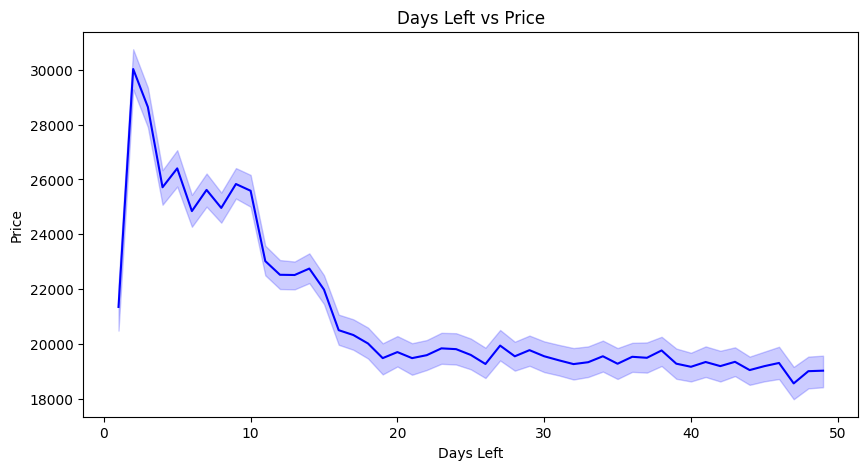

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=flight, x='days_left',y='price', color='blue')
plt.title('Days Left vs Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

/tmp/ipython-input-62-1934406378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight['airline'], y=flight['price'], palette='Set3')


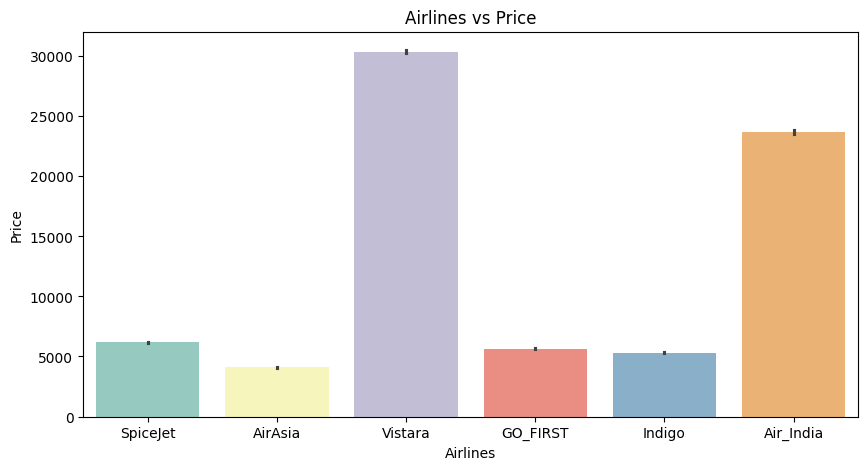

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=flight['airline'], y=flight['price'], palette='Set3')
plt.title('Airlines vs Price')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='class', ylabel='price'>

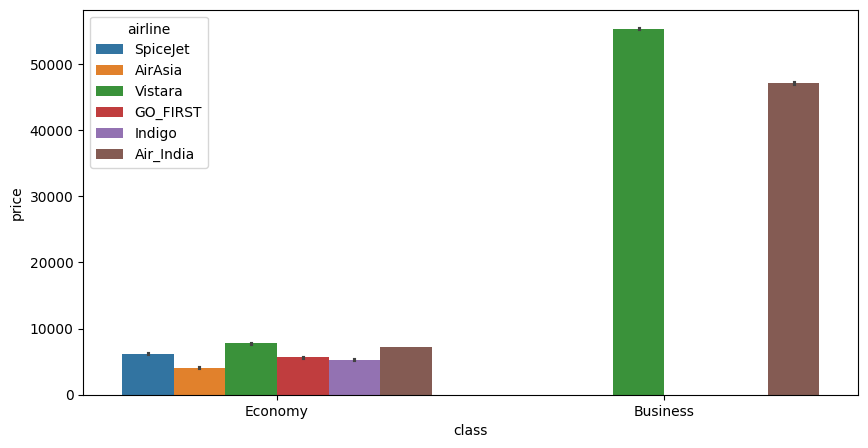

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='class',y='price',data=flight, hue='airline')

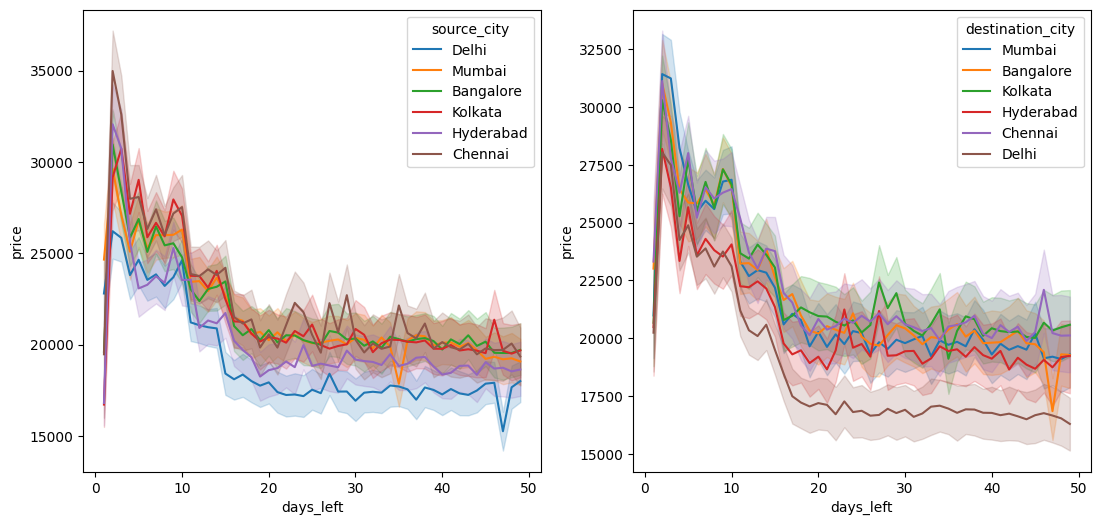

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(13,6))
sns.lineplot(x='days_left',y='price', data=flight,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price', data=flight,hue='destination_city',ax=ax[1])
plt.show()

###Model Building

In [ ]:
#importing neccessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [ ]:
#converting categorical columns to numerical columns
le=LabelEncoder()
for col in flight.select_dtypes(include='object').columns:
  flight[col] = le.fit_transform(flight[col])

In [ ]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


####Feature Selection

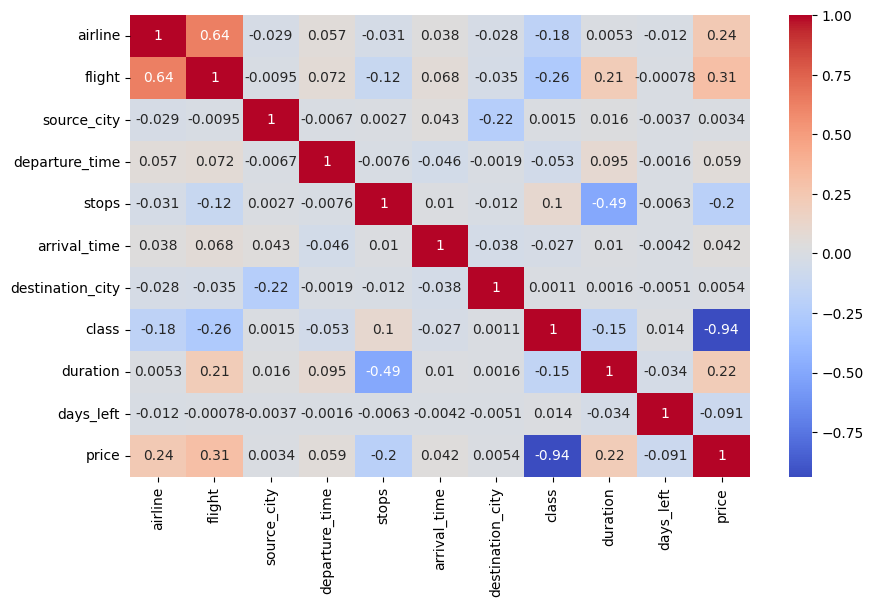

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(flight.corr(),annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
column=[]
for col in flight.columns:
  if((flight[col].dtype!='object')&(col!='price')):
    column.append(col)

X=flight[column]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,airline,6.685307
1,flight,12.662201
2,source_city,2.985762
3,departure_time,2.827016
4,stops,1.465479
5,arrival_time,3.788111
6,destination_city,2.924579
7,class,2.839927
8,duration,5.002091
9,days_left,4.088904


In [ ]:
#drop the column with high VIF
for i in range(len(vif_data)):
  if vif_data.loc[i,"VIF"]>5:
    col_to_drop=vif_data.loc[i, 'feature']
    flight.drop(columns=[col_to_drop], inplace=True)

In [ ]:
#split the data into train and test parts
x=flight.drop('price', axis=1)
y=flight['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
(x_train.shape,y_train.shape),(x_test.shape, y_test.shape)

(((238336, 7), (238336,)), ((59585, 7), (59585,)))

In [ ]:
#Applying Standardization
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

####Linear Regression

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)
lr_y_pred=lr_model.predict(x_test)

In [ ]:
print(f'Mean Squared Error : {mean_squared_error(y_test, lr_y_pred)}')
print(f'R2 Score : {r2_score(y_test, lr_y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, lr_y_pred))}')

Mean Squared Error : 51273257.930345416
R2 Score : 0.9006026779985113
Root Mean Squared Error : 7160.534751702935


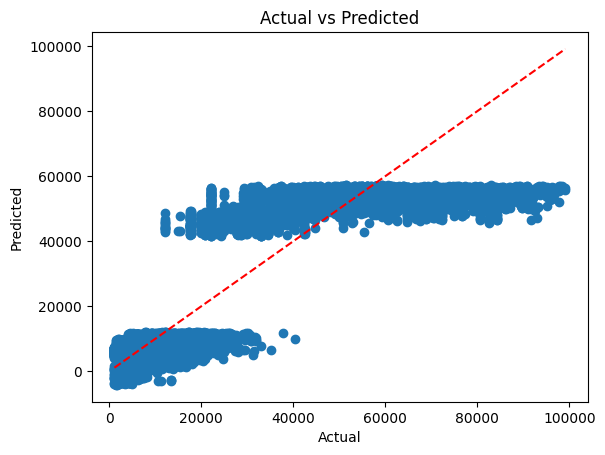

In [ ]:
plt.scatter(y_test, lr_y_pred)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()), 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

/tmp/ipython-input-95-2528056612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
/tmp/ipython-input-95-2528056612.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_y_pred, label='Predicted')


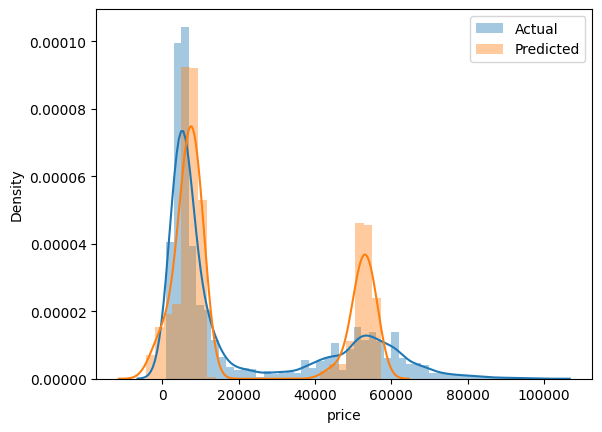

In [ ]:
sns.distplot(y_test, label="Actual")
sns.distplot(lr_y_pred, label='Predicted')
plt.legend()
plt.show()

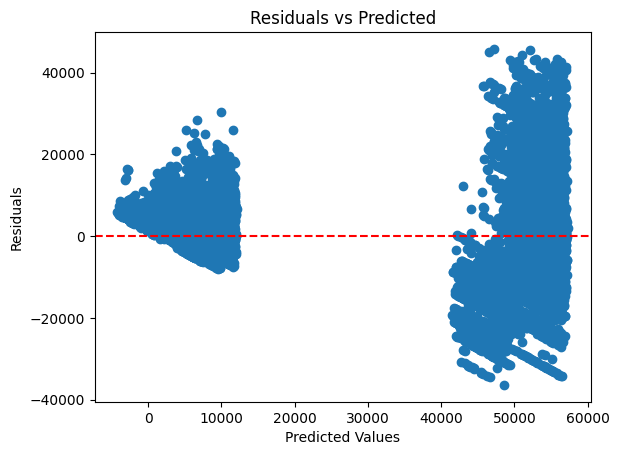

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - lr_y_pred

plt.scatter(lr_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

####Decision Tree Regressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_y_pred=dt_model.predict(x_test)

In [ ]:
print(f'Mean Squared Error : {mean_squared_error(y_test, dt_y_pred)}')
print(f'R2 Score : {r2_score(y_test, dt_y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, dt_y_pred))}')

Mean Squared Error : 32447629.26348258
R2 Score : 0.9370976687600242
Root Mean Squared Error : 5696.282056173358


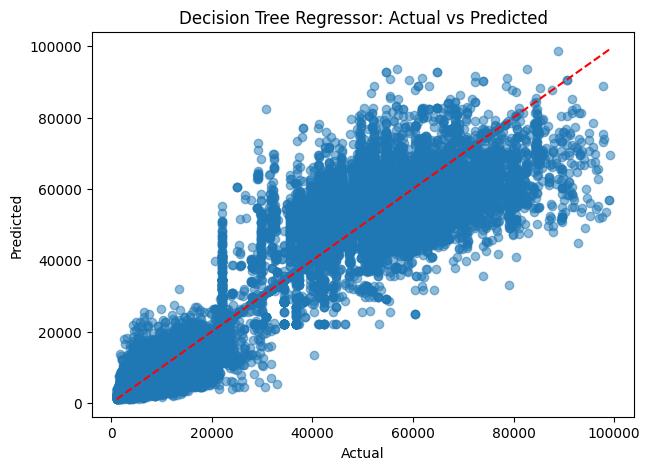

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, dt_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

/tmp/ipython-input-108-1065418622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
/tmp/ipython-input-108-1065418622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_y_pred, label='Predicted')


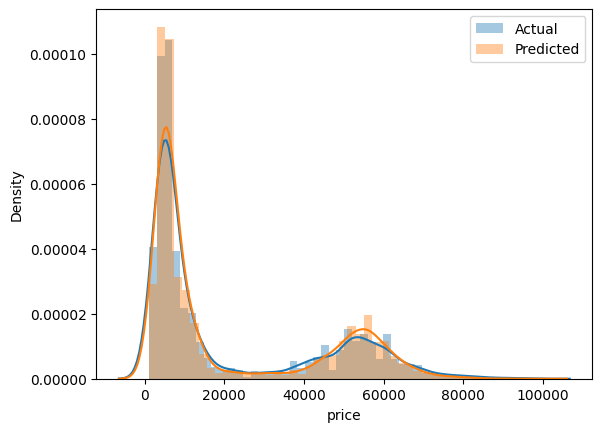

In [ ]:
sns.distplot(y_test, label="Actual")
sns.distplot(dt_y_pred, label='Predicted')
plt.legend()
plt.show()

####Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

In [ ]:
print(f'Mean Squared Error : {mean_squared_error(y_test, rf_y_pred)}')
print(f'R2 Score : {r2_score(y_test, rf_y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, rf_y_pred))}')

Mean Squared Error : 29502707.979600355
R2 Score : 0.9428066348163793
Root Mean Squared Error : 5431.639529608013


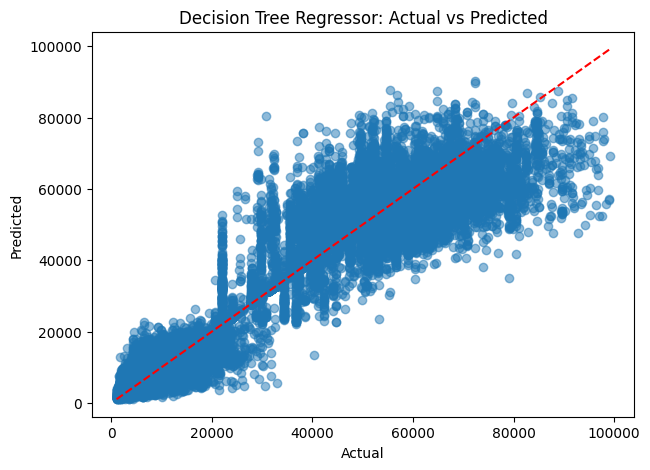

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

/tmp/ipython-input-109-3182424315.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
/tmp/ipython-input-109-3182424315.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_y_pred, label='Predicted')


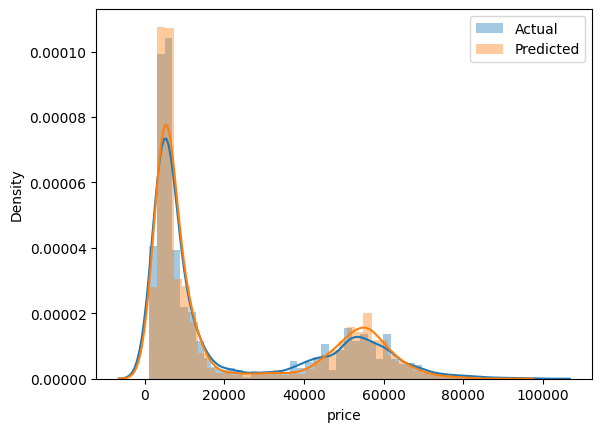

In [ ]:
sns.distplot(y_test, label="Actual")
sns.distplot(rf_y_pred, label='Predicted')
plt.legend()
plt.show()